In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataframe = pd.read_csv('Dataset_csv_unificado\Consolidado EE.csv')

In [10]:
dataframe.head()

,DIA,HORA,Planta (Kw),Elaboracion (Kw),Bodega (Kw),Cocina (Kw),Envasado (Kw),Linea 2 (Kw),Linea 3 (Kw),Linea 4 (Kw),...,Efluentes (Kw),Frio (Kw),Pta Agua / Eflu (Kw),Prod Agua (Kw),Resto Serv (Kw),Restos Planta (Kw),KW Gral Planta,KW CO2,Fecha/Hora,Kw de Frio
0,2022-07-01,02:00:00,1368.76,46.0,101.5,7.0,12.0,30.01,42.0,0.0,...,21.0,787.0,41.0,17.0,161.0,58.76,1476.0,117.0,2022-01-01 01:59:59.712000,787.0
1,2022-07-01,03:00:00,2765.64,93.0,203.5,13.0,26.0,59.64,84.0,0.0,...,42.0,1602.0,84.0,36.0,324.0,115.64,2980.0,229.0,2022-01-01 03:00:00,1602.0
2,2022-07-01,04:00:00,4124.46,141.0,306.0,20.0,38.0,89.21,124.0,0.0,...,64.0,2365.0,126.0,53.0,491.5,165.96,4450.0,336.0,2022-01-01 04:00:00,2365.0
3,2022-07-01,05:00:01,5419.31,182.5,401.5,26.0,50.0,117.81,164.0,0.0,...,83.0,3117.0,166.0,71.0,656.5,216.31,5860.0,401.0,2022-01-01 05:00:01,3117.0
4,2022-07-01,06:00:01,6673.19,228.0,499.0,33.0,62.0,146.19,202.0,0.0,...,104.0,3872.0,206.0,87.0,826.5,258.69,7225.0,419.0,2022-01-01 06:00:01,3872.0


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43515 entries, 0 to 43514
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DIA                   42900 non-null  object 
 1   HORA                  42900 non-null  object 
 2   Planta (Kw)           42902 non-null  float64
 3   Elaboracion (Kw)      42902 non-null  float64
 4   Bodega (Kw)           42902 non-null  float64
 5   Cocina (Kw)           42902 non-null  float64
 6   Envasado (Kw)         42902 non-null  float64
 7   Linea 2 (Kw)          42894 non-null  float64
 8   Linea 3 (Kw)          42902 non-null  float64
 9   Linea 4 (Kw)          42902 non-null  float64
 10  Servicios (Kw)        42902 non-null  float64
 11  Sala Maq (Kw)         42902 non-null  float64
 12  Aire (Kw)             42902 non-null  float64
 13  Calderas (Kw)         42902 non-null  float64
 14  Efluentes (Kw)        42902 non-null  float64
 15  Frio (Kw)          

In [12]:
datos = dataframe[dataframe['HORA']=='23:59:00']
indice_del_maximo = datos['Frio (Kw)'].idxmax()

# 2. Usamos .loc[] con ese índice para obtener la fila completa
fila_con_el_maximo = datos.loc[indice_del_maximo]

print("La fila completa con el valor máximo es:")
print(fila_con_el_maximo)
datos.info()

La fila completa con el valor máximo es:
DIA                     2022-02-18
HORA                      23:59:00
Planta (Kw)               68615.99
Elaboracion (Kw)            6937.5
Bodega (Kw)                13305.5
Cocina (Kw)                 1434.0
Envasado (Kw)              12874.0
Linea 2 (Kw)               6330.99
Linea 3 (Kw)                7958.0
Linea 4 (Kw)                1118.0
Servicios (Kw)             38010.0
Sala Maq (Kw)            8902275.0
Aire (Kw)                  44415.0
Calderas (Kw)                530.0
Efluentes (Kw)              1043.0
Frio (Kw)                8861470.0
Pta Agua / Eflu (Kw)        1595.0
Prod Agua (Kw)               481.0
Resto Serv (Kw)         -8872838.0
Restos Planta (Kw)        10794.49
KW Gral Planta             70515.0
KW CO2                         NaN
Fecha/Hora                     NaN
Kw de Frio                     NaN
Name: 30318, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1694 entries, 22 to 43504
Data columns (total 2

In [13]:
dataframe['DIA'] = pd.to_datetime(dataframe['DIA']).dt.date

condicion_outliers = datos['Frio (Kw)'] > 50000
datos.loc[condicion_outliers, 'Frio (Kw)'] = 50000


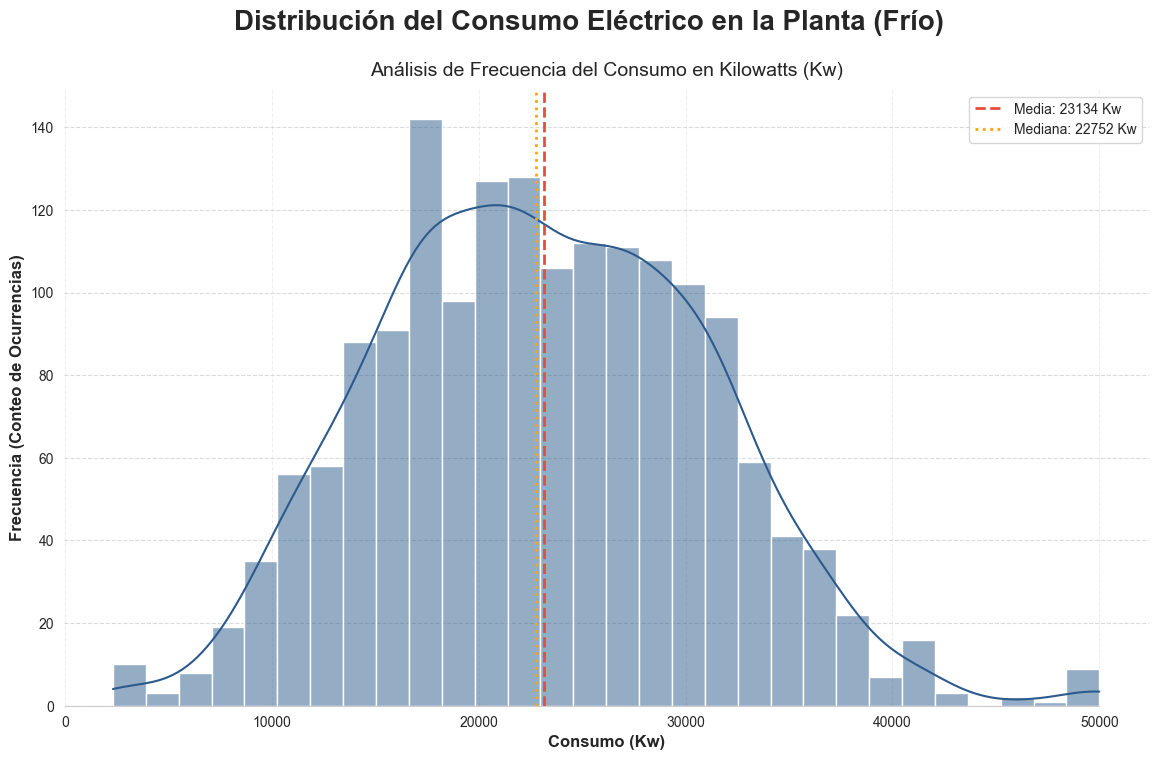

In [14]:
# --- 1. Preparación del Lienzo y Estilo ---
# Usamos un estilo limpio y profesional como base.
sns.set_style("whitegrid")
# Definimos una paleta de colores sofisticada. Un azul profundo y un rojo para acentos.
color_principal = "#2c5a8c"
color_acento = "#e74c3c"
# --- 2. Creación de la Figura y los Ejes ---
# Esto nos da control total sobre el tamaño y los elementos del gráfico.
fig, ax = plt.subplots(figsize=(14, 8))
# --- 3. El Histograma Mejorado ---
# Graficamos el histograma y la estimación de densidad (KDE)
sns.histplot(data=datos, x='Frio (Kw)', kde=True, color=color_principal, bins=30, ax=ax)
# --- 4. Anotaciones y Contexto: La Historia de los Datos ---
# Calculamos la media y la mediana para añadir contexto
media = datos['Frio (Kw)'].mean()
mediana = datos['Frio (Kw)'].median()
# Añadimos líneas verticales para marcar la media y la mediana
ax.axvline(media, color=color_acento, linestyle='--', linewidth=2, label=f'Media: {media:.0f} Kw')
ax.axvline(mediana, color='orange', linestyle=':', linewidth=2, label=f'Mediana: {mediana:.0f} Kw')
# Creamos un título y subtítulo informativos y elegantes
fig.suptitle('Distribución del Consumo Eléctrico en la Planta (Frío)', 
             fontsize=20, weight='bold', ha='center')
ax.set_title('Análisis de Frecuencia del Consumo en Kilowatts (Kw)', 
           fontsize=14, pad=10)
# --- 5. Refinamiento Estético: El Toque del Maestro ---
# Personalizamos las etiquetas de los ejes para que sean claras y tengan unidades
ax.set_xlabel('Consumo (Kw)', fontsize=12, weight='bold')
ax.set_ylabel('Frecuencia (Conteo de Ocurrencias)', fontsize=12, weight='bold')
# Hacemos la grilla más sutil para que no distraiga
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='x', linestyle='--', alpha=0.3)
# Removemos los bordes innecesarios del gráfico (Tufte's principle)
sns.despine(trim=True, left=True)
# Añadimos una leyenda clara y bien ubicada
ax.legend()
# Ajustamos el layout para que todo encaje perfectamente
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# --- 6. Mostrar la Obra de Arte ---
plt.show()